In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

C:\Users\TJ\anaconda3\envs\ml01-02\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\TJ\anaconda3\envs\ml01-02\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
# 데이터 셋
boston = load_boston()

boston_df = pd.DataFrame(
      boston.data
    , columns=boston.feature_names
    )

boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [11]:
# df에 target data 추가
boston_df['PRICE'] = boston.target
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


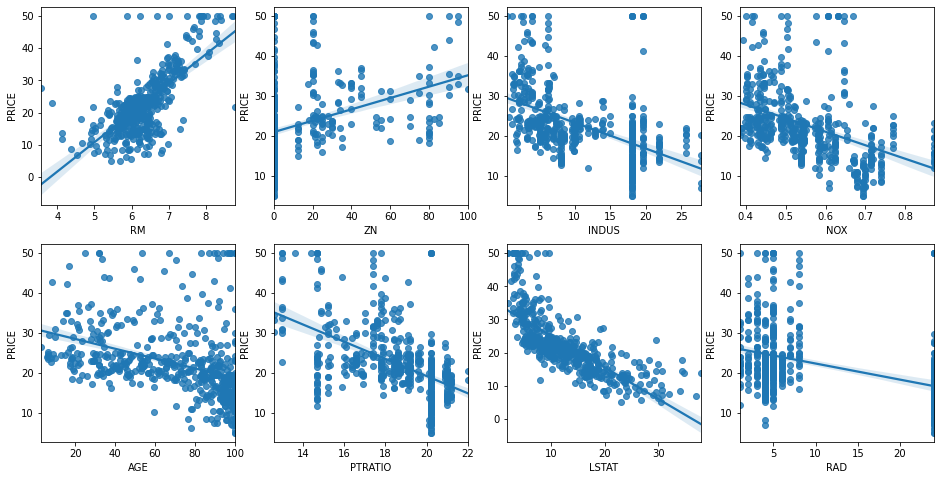

In [15]:
# 시각화 : 산점도(데이터 분포), 상관관계
# 8개의 각각의 피처 와 가격관의 관계 시각화
# 8개 축 필요
# 8(2X4)개의 축 생성 : subplots() -> figure, axes
fig , axs = plt.subplots(
      figsize=(16,8)
    , ncols=4
    , nrows=2
)

lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for idx, feature in enumerate(lm_features):
    row = int(idx/4)
    col = idx % 4
    
    sns.regplot(
          x=feature
        , y='PRICE'
        , data=boston_df
        , ax=axs[row][col] # 표시할 축 지정
    )

In [16]:
# 선형 회귀 구현
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [17]:
# 데이터 분리
X_data =boston_df.drop(
      ['PRICE']
    , axis=1
    , inplace=False
)

# 답 분리
y_target = boston_df['PRICE']

# 학습 / 테스트 분리
X_train, X_test, y_train, y_test = \
train_test_split(
      X_data
    , y_target
    , test_size=0.3
    , random_state=156
)

In [19]:
# 모델 객체 생성 / 학습 / 평가

lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측값
y_preds = lr.predict(X_test)

# 오차 구하기
mse = mean_squared_error(y_test, y_preds) # 평균제곱오차
rmse = np.sqrt(mse) # 루트평균제곱오차

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('성능평가 : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
성능평가 : 0.757


In [22]:
# 계수, 절편 값 확인
# f(x) = w0 * 1 + w1 *1 + ... + w12 * 12 + inter(절편)
intercept__ = lr.intercept_ # 절편 저장
coef__ = lr.coef_ # 계수 저장
print('절편값 : ',intercept__)
print('회귀계수 : ', np.round(coef__,1))

절편값 :  40.995595172164336
회귀계수 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [24]:
coef = pd.Series(
      data=np.round(lr.coef_,1)
    , index=X_data.columns
)
coef.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [25]:
# cross_validation (교차검증)
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1)

lr = LinearRegression()

# 5개 Fold로 검증
neg_mse_scores = cross_val_score(
      lr     # 적용할 모델
    , X_data # 데이터 -> X_train
    , y_target # 답 -> y_train
    , scoring='neg_mean_squared_error'
    , cv=5 # Fold 개수
)

In [28]:
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [29]:
print('개별 Negative MSE Score : ', np.round(neg_mse_scores,2))

개별 Negative MSE Score :  [-12.46 -26.05 -33.07 -80.76 -33.31]


In [30]:
print('평균 RMSE Score :', np.round(avg_rmse,2))

평균 RMSE Score : 5.83
